<a href="https://colab.research.google.com/github/felipeaninir/sales-predictions/blob/main/KNeighborsRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [58]:
df = pd.read_csv('/content/drive/MyDrive/PTDataScience/PandasParaManipulaciónDeDatos/sales_predictions.csv')
print(df.shape)
df.head()

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [59]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [60]:
# Rellenado de los valores nulos con la media
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [61]:
# "Mapeo"" de los valores categóricos y luego reemplazándolos con el valor de la mediana
df['Outlet_Size'] = df['Outlet_Size'].map({'Small':1, 'Medium':2, 'High':3})

print("Media : ", df['Outlet_Size'].median())
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].median())
df.isnull().sum()

Media :  2.0


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [62]:
#Corriegiendo la categorias del campo del contenido de grasa del producto
print(df['Item_Fat_Content'].value_counts())

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(df['Item_Fat_Content'].value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


# Variable target

Describe
count     8523.00
mean      2181.29
std       1706.50
min         33.29
25%        834.25
50%       1794.33
75%       3101.30
max      13086.96
Name: Item_Outlet_Sales, dtype: float64

Top 10 Value counts
958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
1230.3984    14
1416.8224    13
539.2980     12
759.0120     12
1211.7560    12
Name: Item_Outlet_Sales, dtype: int64


Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

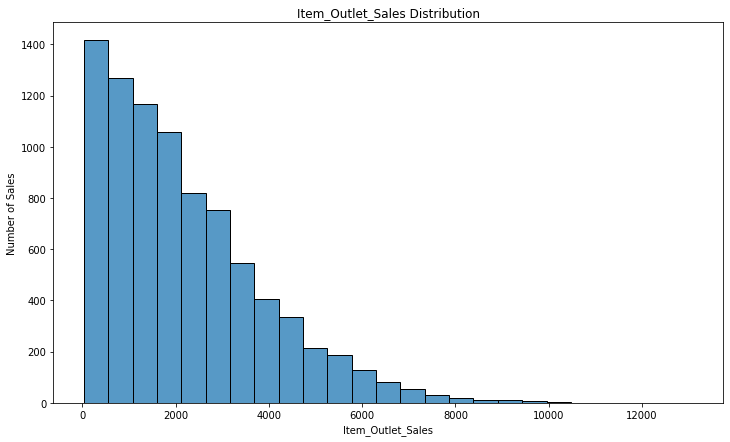

In [63]:
print("Describe")
print(df.Item_Outlet_Sales.describe().round(2))
print("")
print("Top 10 Value counts")
print(df.Item_Outlet_Sales.value_counts().head(10))
plt.figure(figsize=(12,7))
sns.histplot(df.Item_Outlet_Sales, bins = 25)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

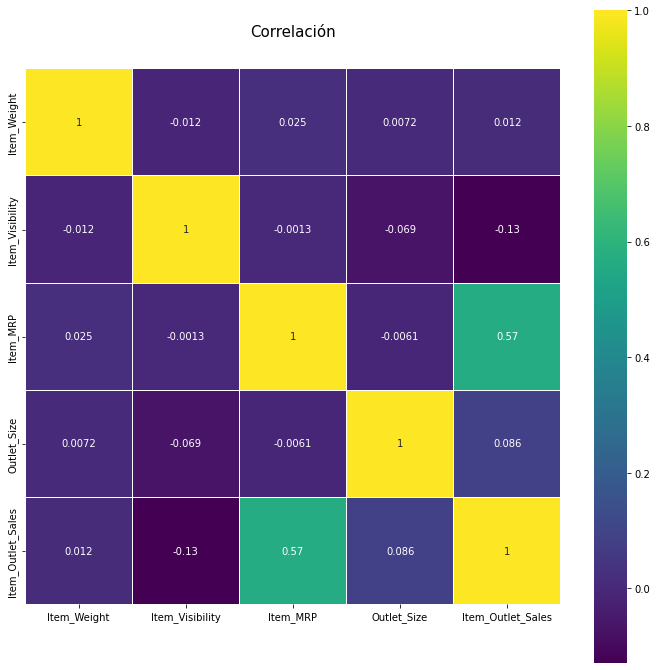

In [64]:
corr = df.select_dtypes(include=[np.number]) 
corr = corr.drop('Outlet_Establishment_Year', axis=1)
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlación', y=1.05, size=15)
sns.heatmap(corr.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

#One-hot encode

In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type','Outlet_Type']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type'])
print(df.shape)
df.head()

(8523, 36)


,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,...,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,9,1,0,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,3,0,1,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,9,1,0,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,732.3800,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,994.7052,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [66]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Outlet                         int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_0                    uint8
Item_Type_1                    uint8
Item_Type_2                    uint8
Item_Type_3                    uint8
Item_Type_4                    uint8
Item_Type_5                    uint8
Item_Type_6                    uint8
I

#Regresion lineal

In [67]:
# matriz de características y vector de destino
X =  df.select_dtypes(include=[np.number]) 
X = X.drop('Outlet_Establishment_Year', axis=1) # Califica como variable categorica
y = df.loc[:, 'Item_Outlet_Sales'].values

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [69]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn.predict(X_test)
score = knn.score(X_test, y_test)
score

0.7726784370550972

# Evaluacion

In [70]:
# Variables
predict = knn.predict(X)
mean = np.mean(predict)
print('Media: {}'.format(mean.round(2)))


def function_mae(a,b):
    mae = 0
    c = 0
    for i in a:
      mae += abs(i-b)
      c += 1
    return mae / c

out_mae = function_mae(predict, mean)
print('Error absoluto medio (MAE): {}'.format(out_mae.round(2)))


def function_mse(a, b):
    mse = 0
    c = 0
    for i in a:
        mse += (i-b)**2
        c += 1
    return mse / c

out_mse = function_mse(predict, mean)
print('Error cuadrático medio (MSE): {}'.format(out_mse.round(2)))

rmse = (out_mse)**(1/2)
print('Raíz del error cuadrático medio (RMSE): {}'.format(rmse.round(2)))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Media: 11585.97
Error absoluto medio (MAE): 7.34
Error cuadrático medio (MSE): 178.66
Raíz del error cuadrático medio (RMSE): 13.37


¿Hay algo que puedas hacer para mejorar el modelo?

R. Creo que se puede profundizar aun mas el procesamiento de variables de manera ajustar el modelo

